In [1]:
!pip install SpeechRecognition
!pip install matplotlib
!pip install librosa
!pip install pandas
!pip install tensorflow
!pip install transformers datasets evaluate seqeval
!pip install tf-keras
!pip install tensorflow[and-cuda]
!pip install ipywidgets --upgrade

In [2]:
import os
import librosa
import numpy as np
import json
import pandas as pd

In [3]:
# import speech_recognition as sr
# recognizer = sr.Recognizer()
# # input a file_path to a .wav file
# # returns the transcribed audio as a string
# # we can use BERT like in the homework to then tokenize/make into array and analyze it
# def getVectorOfWords(file_path):
#     with sr.AudioFile(file_path) as source:
#         audio = recognizer.record(source)
#     try:
#         # print("Transcription:", recognizer.recognize_google(audio))
#         return "" + recognizer.recognize_google(audio)
#     except sr.UnknownValueError:
#         return None

In [4]:
# removes all files from images folder so subsequent runs don't have weird overlaps
# def clearImagesFolder():
#     print("Deleting all data from images folder")
#     directory = os.getcwd() + "/images"
#     for root, dirs, files in os.walk(directory, topdown=False):  # topdown=False to delete files before dirs
#         for file_name in files:
#             file_path = os.path.join(root, file_name)
#             if os.path.isfile(file_path) and file_name.endswith('.png'):
#                 os.remove(file_path)
#                 # print("" + file_path + " has been removed successfully")
#     print("All images removed successfully!")

In [5]:
# import librosa.display
# import matplotlib.pyplot as plt
# # input a file_path to a .wav file
# # returns a png of the spectogram and a filepath to it
# def getSpectogram(file_path, emotion_label):
#     y, sr = librosa.load(file_path, sr=None) # load in the audio file and preserve its sample rate (replace with 16,000 if needed)
    
#     # Compute the spectrogram
#     D = librosa.stft(y)                        # Short-Time Fourier Transform
#     S_db = librosa.amplitude_to_db(abs(D), ref=np.max)  # Convert to decibel scale

#     # Plot and save the spectrogram
#     fig = plt.figure(figsize=(6, 6))                # Set the figure size -- > num pixels will be 100 times this
#     # can change the cmap to "viridis" or "plasma" for different color themes
#     librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log", cmap="magma")  # Log frequency scale to mimic human audio perception

#     # TODO: at first try hiding as many extra features as possible and compare to when they're included
#     # plt.colorbar(format="%+2.0f dB")           # Add a colorbar
#     # plt.title("Spectrogram")
#     # plt.xlabel("Time (s)")
#     # plt.ylabel("Frequency (Hz)")
#     plt.tight_layout()
    
#     # Save the spectrogram as an image file
#     processed_path = (file_path.split("/")[-1]).split(".")[0]
#     output_image_path = f"./images/{emotion_label}/{processed_path}.png"  # TODO: figure out naming conventions for the file -- either use path or just have a counter that we pass in
#     plt.savefig(output_image_path, dpi=300)    # Save as PNG with high resolution
#     plt.close()                                # Close the figure to free memory
    
#     return output_image_path

In [6]:
# def getTargetEmotionFromCSV(audio_file_name):
#     # parse audio_file_name to get distinguishing file info for CSV lookup
#     dialogueID, utteranceID = (audio_file_name.split(".wav")[0]).split('_')
#     dialogueID, utteranceID = int(dialogueID[3:]), int(utteranceID[3:])
#     csv = pd.read_csv('./train_sent_emo.csv')
#     # Filter the row(s) that satisfy both conditions
#     condition1 = (csv['Dialogue_ID'] == dialogueID)  # First column matches 'dialogueID'
#     condition2 = (csv['Utterance_ID'] == utteranceID)  # Second column matches 'utteranceID'
#     filtered_rows = csv[condition1 & condition2]
#     return filtered_rows['Emotion'].iloc[0]

In [7]:
# def traverse_audio_files(directory="./train_splits_wav"):
#     # clearImagesFolder() # deletes everything from the image folder
#     data = []
    
#     # Traverse and process .wav files
#     print("Starting audio file traversal")
#     iterCount = 0
#     for file_name in os.listdir(directory):
#         # limit the number of loops so this doesn't take THAT long
#         if iterCount >= 3000:
#             break
#         file_path = os.path.join(directory, file_name)
        
#         if os.path.isfile(file_path) and file_name.endswith('.wav'):
#             transcription = getVectorOfWords(file_path)
#             # filter out the audio files that can't get a clear transcription
#             if not transcription:
#                 continue
#             emotion = getTargetEmotionFromCSV(file_name)
#             image_path = getSpectogram(file_path, emotion)
#             data.append({"Transcription": transcription, "Spectogram": image_path, "Emotion": emotion})
#         iterCount += 1
#     df = pd.DataFrame(data)
#     print("Finished creating dataframe and traversing audio files")
#     return df

In [8]:
# df = traverse_audio_files()
# df.to_csv('data3000.csv', index=False)
# print(df)

In [9]:
df = pd.read_csv('data9000.csv')
emotion_labels = df['Emotion'].unique()
print(emotion_labels)
print(df)

['neutral' 'joy' 'fear' 'surprise' 'sadness' 'disgust' 'anger']
                                          Transcription  \
0                                                 Mrs M   
1                                     why did you write   
2                                 I heard what you said   
3                                            for a walk   
4     when did they made me head of purchasing thank...   
...                                                 ...   
3826  play Joey's lovable 2 but the thing about Joey...   
3827                                  what do you think   
3828                                         I guess so   
3829  so I'm just going to go back to talking to my ...   
3830                                               Ross   

                                 Spectogram   Emotion  
0      ./images9000/neutral/dia575_utt1.png   neutral  
1     ./images9000/neutral/dia689_utt12.png   neutral  
2      ./images9000/neutral/dia845_utt8.png   neutral  
3  

In [15]:
##### prepreocessing
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import keras.callbacks
### code following chat

### prep for BERT
from transformers import DistilBertTokenizer
import torch
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize transcriptions
texts = list(df['Transcription'])
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# input_ids = tokens['input_ids']  # Tokenized inputs
# attention_masks = tokens['attention_mask']  # Attention masks
input_ids = tokens['input_ids'].numpy()  # Convert to NumPy array
attention_masks = tokens['attention_mask'].numpy()

### prep for CNN
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

image_paths = list(df['Spectogram'])
images = []

for path in image_paths:
    # Load image
    img = load_img(path, target_size=(128, 128))  # Resize to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    images.append(img_array)

images = np.array(images)  # Shape: (batch_size, 128, 128, 3)
# labels = list(df['Emotion'])
labels = pd.factorize(df['Emotion'])[0]  # Convert categorical to integers
### split the data
from sklearn.model_selection import train_test_split
# Step 1: Split data into training + validation and test sets
x_images_trainval, x_images_test, x_text_trainval, x_text_test, x_attention_trainval, x_attention_test, y_trainval, y_test = train_test_split(
    images, input_ids, attention_masks, labels, test_size=0.15, random_state=42, stratify=labels
)
# Step 2: Further split training + validation into training and validation sets
x_images_train, x_images_val, x_text_train, x_text_val, x_attention_train, x_attention_val, y_train, y_val = train_test_split(
    x_images_trainval, x_text_trainval, x_attention_trainval, y_trainval, test_size=0.15, random_state=42, stratify=y_trainval
)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from transformers import TFDistilBertModel

# BERT Model Wrapper
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.bert = TFDistilBertModel.from_pretrained("distilbert-base-uncased")
    
    def call(self, inputs, training=False):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, training=training)
        return outputs.last_hidden_state[:, 0, :]  # CLS token embedding

# BERT Branch
text_input = layers.Input(shape=(46,), dtype='int32', name='text_input')  # Adjust shape accordingly
attention_input = layers.Input(shape=(46,), dtype='int32', name='attention_input')
bert_output = BertLayer()([text_input, attention_input])
bert_dense = layers.Dense(128, activation='relu')(bert_output)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [84]:
# make array for cnn_models
cnn_models = []

In [93]:
# CNN Branch -- model 8
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model8 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model8.summary())

cnn_models.append(("model8", model8))

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_158 (Conv2D) │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_150   │ (None, 63, 63,    │          0 │ conv2d_158[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_159 (Conv2D) │ (None, 61, 61,    │     18,496 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_151   │ (None, 30, 30,    │          0 │ conv2d_159[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_23          │ (None, 57600)     │          0 │ max_pooling2d_15… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_3        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 57600)     │          0 │ flatten_23[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     98,432 │ bert_layer_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_85 (Dense)    │ (None, 128)       │  7,372,928 │ dropout_27[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 256)       │          0 │ dense_12[0][0],   │
│ (Concatenate)       │                   │            │ dense_85[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 64)        │     16,448 │ concatenate_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_87 (Dense)    │ (None, 10)        │        650 │ dense_86[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,507,850 (28.64 MB)

 Trainable params: 7,507,850 (28.64 MB)

 Non-trainable params: 0 (0.00 B)

None


In [94]:
# CNN Branch -- model 10
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model10 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model10.summary())

cnn_models.append(("model10", model10))

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_160 (Conv2D) │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_152   │ (None, 63, 63,    │          0 │ conv2d_160[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_161 (Conv2D) │ (None, 61, 61,    │     18,496 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_153   │ (None, 30, 30,    │          0 │ conv2d_161[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_162 (Conv2D) │ (None, 28, 28,    │     36,928 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_154   │ (None, 14, 14,    │          0 │ conv2d_162[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_24          │ (None, 12544)     │          0 │ max_pooling2d_15… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_3        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 12544)     │          0 │ flatten_24[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     98,432 │ bert_layer_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_88 (Dense)    │ (None, 128)       │  1,605,760 │ dropout_28[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_24      │ (None, 256)       │          0 │ dense_12[0][0],   │
│ (Concatenate)       │                   │            │ dense_88[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_89 (Dense)    │ (None, 64)        │     16,448 │ concatenate_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_90 (Dense)    │ (None, 10)        │        650 │ dense_89[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,777,610 (6.78 MB)

 Trainable params: 1,777,610 (6.78 MB)

 Non-trainable params: 0 (0.00 B)

None


In [95]:
# CNN Branch -- model 12
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model12 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model12.summary())

cnn_models.append(("model12", model12))

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_163 (Conv2D) │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_155   │ (None, 63, 63,    │          0 │ conv2d_163[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_164 (Conv2D) │ (None, 61, 61,    │     18,496 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_156   │ (None, 30, 30,    │          0 │ conv2d_164[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_165 (Conv2D) │ (None, 28, 28,    │     36,928 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_157   │ (None, 14, 14,    │          0 │ conv2d_165[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_166 (Conv2D) │ (None, 12, 12,    │     36,928 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_158   │ (None, 6, 6, 64)  │          0 │ conv2d_166[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_25          │ (None, 2304)      │          0 │ max_pooling2d_15… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_3        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 2304)      │          0 │ flatten_25[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     98,432 │ bert_layer_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_91 (Dense)    │ (None, 128)       │    295,040 │ dropout_29[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_25      │ (None, 256)       │          0 │ dense_12[0][0],   │
│ (Concatenate)       │                   │            │ dense_91[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 503,818 (1.92 MB)

 Trainable params: 503,818 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [96]:
# CNN Branch -- model 13
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model13 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model13.summary())

cnn_models.append(("model13", model13))

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_167 (Conv2D) │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_159   │ (None, 63, 63,    │          0 │ conv2d_167[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_168 (Conv2D) │ (None, 61, 61,    │     18,496 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_160   │ (None, 30, 30,    │          0 │ conv2d_168[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 30, 30,    │          0 │ max_pooling2d_16… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_169 (Conv2D) │ (None, 28, 28,    │     36,928 │ dropout_30[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_161   │ (None, 14, 14,    │          0 │ conv2d_169[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_170 (Conv2D) │ (None, 12, 12,    │     36,928 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_162   │ (None, 6, 6, 64)  │          0 │ conv2d_170[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_26          │ (None, 2304)      │          0 │ max_pooling2d_16… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_3        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 2304)      │          0 │ flatten_26[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     98,432 │ bert_layer_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_94 (Dense)    │ (None, 128)       │    295,040 │ dropout_31[0][0]  │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 503,818 (1.92 MB)

 Trainable params: 503,818 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [97]:
# CNN Branch -- model 15
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(10, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model15 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model15.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model15.summary())

cnn_models.append(("model15", model15))

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_171 (Conv2D) │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_163   │ (None, 63, 63,    │          0 │ conv2d_171[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_172 (Conv2D) │ (None, 61, 61,    │     18,496 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_164   │ (None, 30, 30,    │          0 │ conv2d_172[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_173 (Conv2D) │ (None, 28, 28,    │     36,928 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_165   │ (None, 14, 14,    │          0 │ conv2d_173[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_174 (Conv2D) │ (None, 12, 12,    │     36,928 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_166   │ (None, 6, 6, 64)  │          0 │ conv2d_174[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_97 (Dense)    │ (None, 6, 6, 128) │      8,320 │ max_pooling2d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_175 (Conv2D) │ (None, 4, 4, 64)  │     73,792 │ dense_97[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_167   │ (None, 2, 2, 64)  │          0 │ conv2d_175[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_27          │ (None, 256)       │          0 │ max_pooling2d_16… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_3        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_32          │ (None, 256)       │          0 │ flatten_27[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 323,786 (1.24 MB)

 Trainable params: 323,786 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

None


In [98]:
##### train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',    # Metric to monitor (e.g., validation loss)
    patience=5,            # Number of epochs with no improvement after which training stops
    restore_best_weights=True  # Restore the best weights once training stops
)

histories = []
for label, model in cnn_models:
    print(label)
    # Train the model
    history = model.fit(
        x={'text_input': x_text_train, 'attention_input': x_attention_train, 'image_input': x_images_train},
        y=y_train,
        batch_size=32,
        epochs=50,
        validation_data=(
            {'text_input': x_text_val, 'attention_input': x_attention_val, 'image_input': x_images_val},
            y_val
        ),
        callbacks=[early_stopping]
    )
    histories.append((label, history))
    print("Best validation accuracy percentage:", max(history.history['val_accuracy']) * 100, "%\n")


model20
Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5575 - loss: 1.2386 - val_accuracy: 0.5297 - val_loss: 1.3796
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5674 - loss: 1.1856 - val_accuracy: 0.4990 - val_loss: 1.3824
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5810 - loss: 1.1862 - val_accuracy: 0.5092 - val_loss: 1.3936
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5846 - loss: 1.1593 - val_accuracy: 0.5072 - val_loss: 1.4029
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5833 - loss: 1.1400 - val_accuracy: 0.4949 - val_loss: 1.3988
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5880 - loss: 1.1365 - val_accuracy: 0.4847 - val_loss: 1.4153
Best validation accuracy percentage: 52.96523571014404 %

model8
Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 25s 135ms/step - accuracy: 0.4626 - loss: 1.6284 - val_accuracy: 0.5010 - val_loss: 1.4319
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━

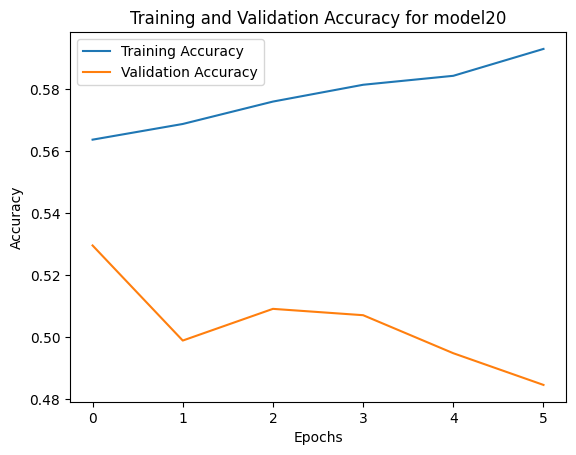

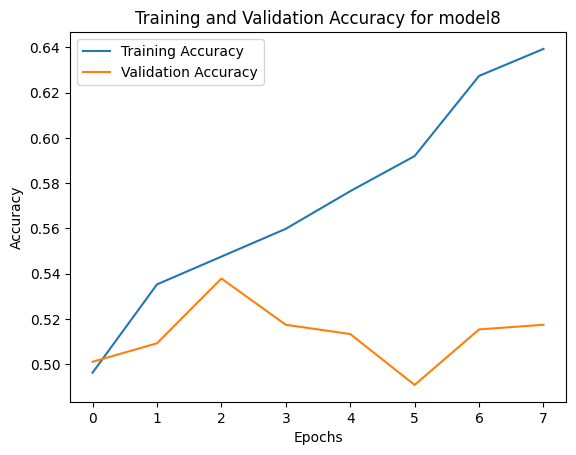

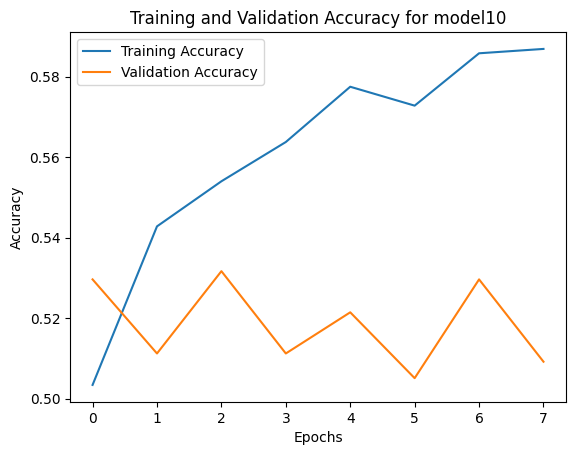

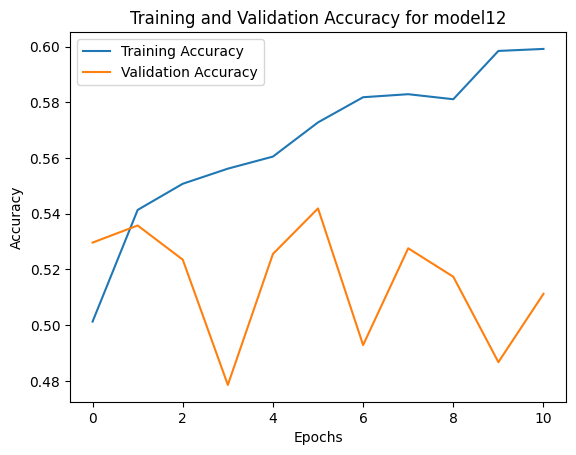

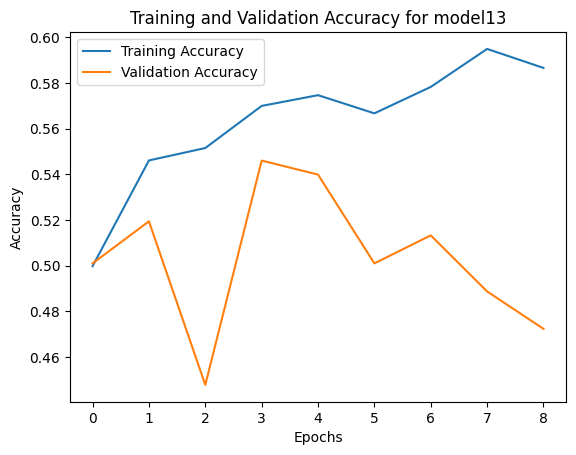

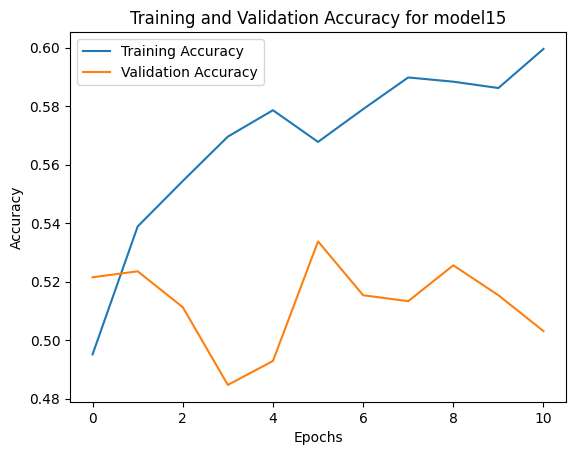

In [100]:
### graphs
import matplotlib.pyplot as plt
# Plot training vs. validation accuracy
for name, history in histories:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('./plots/train_vs_val_acc', dpi=300)
    plt.show()

In [102]:
from sklearn.metrics import accuracy_score, f1_score

# Predict on the test data
for name, model in cnn_models:
    print(name)
    y_pred = model.predict({'text_input': x_text_test, 'attention_input': x_attention_test, 'image_input': x_images_test})
    y_pred_classes = y_pred.argmax(axis=1)  # Convert softmax outputs to class predictions
    
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")
    
    f1 = f1_score(y_test, y_pred_classes, average='weighted')  # Use 'weighted' to account for class imbalance
    print(f"F1 Score (Weighted): {f1:.4f}")
    
    f1_per_class = f1_score(y_test, y_pred_classes, average=None)
    for idx, label in enumerate(emotion_labels):
        print(f"F1 Score for {label}: {f1_per_class[idx]:.4f}")

model20
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

2024-12-08 16:35:23.050669: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[31,64,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,128,6,6]{3,2,1,0}, f32[64,128,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step
Accuracy: 0.5148
F1 Score (Weighted): 0.4206
F1 Score for neutral: 0.6788
F1 Score for joy: 0.2381
F1 Score for fear: 0.0000
F1 Score for surprise: 0.1795
F1 Score for sadness: 0.2222
F1 Score for disgust: 0.0000
F1 Score for anger: 0.1096
model8
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step
Accuracy: 0.5096
F1 Score (Weighted): 0.4401
F1 Score for neutral: 0.6888
F1 Score for joy: 0.2414
F1 Score for fear: 0.0000
F1 Score for surprise: 0.1978
F1 Score for sadness: 0.2532
F1 Score for disgust: 0.0000
F1 Score for anger: 0.1964
model10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step
Accuracy: 0.4939
F1 Score (Weighted): 0.4357
F1 Score for neutral: 0.6743
F1 Score for joy: 0.2205
F1 Score for fear: 0.0000
F1 Score for surprise: 0.2474
F1 Score for sadness: 0.3059
F1 Score for disgust: 0.0741
F1 Score for anger: 0.1458
model12
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step
Accuracy: 0.5165
F1 Score (Weighted): 0.4045
F1 Score for neutral: 0.6810
F1 Score for joy: 0

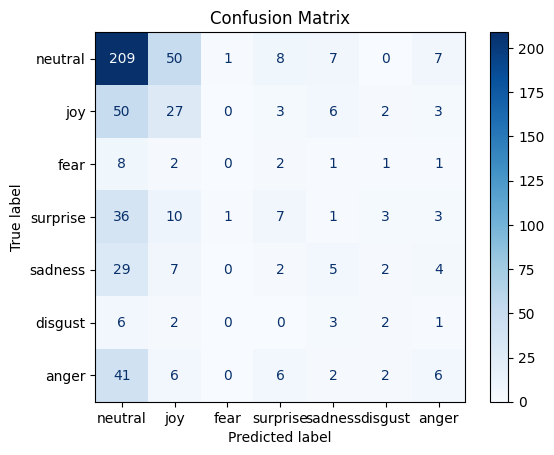

In [37]:
## could either move this into the for loop above or save the y_pred_classes in an array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('./plots/confusion_matrix', dpi=300)
plt.show()


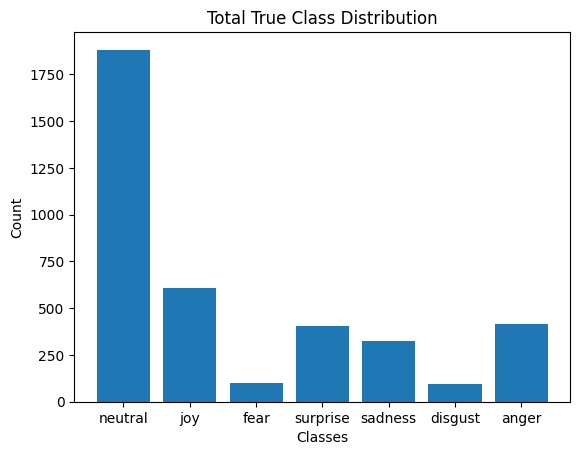

In [103]:
# Combine the true labels from the training, validation, and test sets
y_all_classes = np.concatenate([y_train, y_val, y_test])

# Plot class distribution of all labels
unique, counts = np.unique(y_all_classes, return_counts=True)
plt.bar(unique, counts, tick_label=emotion_labels)  # Use emotion_labels to label your classes
plt.title('Total True Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.savefig('./plots/total_true_class_distribution', dpi=300)
plt.show()


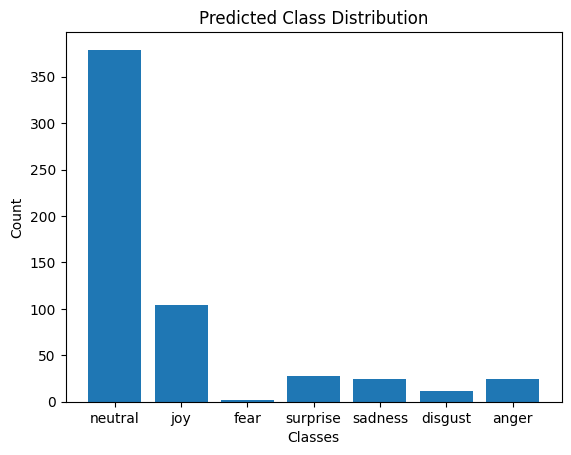

In [39]:
# Get predicted classes
y_pred_classes = y_pred.argmax(axis=1)

# Plot class distribution
unique, counts = np.unique(y_pred_classes, return_counts=True)
plt.bar(unique, counts, tick_label=emotion_labels)
plt.title('Predicted Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.savefig('./plots/pred_class_distribution', dpi=300)
plt.show()
